## Prediction of Career Lengths of NBA Players

The dataset details the performance metrics of NBA players and whether their careers span more than 5 years or not. 

### Aim
The task is to predict whether the careers of these players will span for more than 5 years or less.


### Feature descriptions:
The dataset contains columns giving values for points attained by NBA players in their careers. The description of the features is as given below


|Features|Description|
|----|----|
|Name| Name of the Player|
|Games Played|Number of Games Played by the player|
|Minutes| Minutes Played
|Points| Points Per Game|
|Field Goals Made| Successful field goals made|
|Field Goals Attempted | Field goals attempted |
|Field Goals Percentage | Percentage of successful field goals out of the field goals attempted|
|3 Pointers Made| Successful 3 pointer attempts|
|3 Pointers Attempted | Total 3 pointers attempted|
|3 Pointers Percentage | Percentage of successful 3 pointers out of those attempted|
|Free Throws Made| Successful number of free throws | 
|Free Throws Attempted| Total attempted number of free throws|
|Free Throw Percentage| Successful number of free throws out of those attempted|
|OREB|Offesnisve Rebounds|
|DREB|Defensive Rebounds |
|REB|Rebounds|
|AST|Assists|
|STL|Steals|
|BLK|Number of blocks|
|TOV |Number of Turnovers|
|Play for more than 5 years or less| 1 if career length is greater than 5 years else 0 if career length is less than 5 years|

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)

### Read the data. List the categorical and continuous features in the dataset. Find the number of null values in every feature and impute them appropriately. 

In [2]:
# Read the data
df = pd.read_csv('NBA_players.csv')

In [3]:
df.head()

,Name,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
df.isnull().sum()

Name                                   0
Games Played                           0
Minutes                                0
Points                                 0
Field Goals Made                       0
Field Goals Attempted                  0
Field Goals Percentage                 0
3 Pointers Made                        0
3 Pointers Attempted                   0
3 Pointers Percentage                 11
Free Throws Made                       0
Free Throws Attempted                  0
Fre Throw Percentage                   0
OREB                                   0
DREB                                   0
REB                                    0
AST                                    0
STL                                    0
BLK                                    0
TOV                                    0
Play for more than 5 years or less     0
dtype: int64

In [5]:
df['3 Pointers Percentage'] = df['3 Pointers Percentage'].replace(to_replace = np.nan,value=0)

In [6]:
df['3 Pointers Percentage'].isnull().sum()

0

### Seperate the independent features and target

In [7]:
X = df.drop('Play for more than 5 years or less',1)
y = df['Play for more than 5 years or less']

### Check for class distribution in the target

In [8]:
df['Play for more than 5 years or less'].value_counts()

1.0    831
0.0    509
Name: Play for more than 5 years or less, dtype: int64

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

In [9]:
cols_con = X.drop('Name',1) 

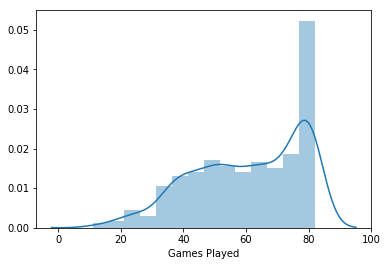

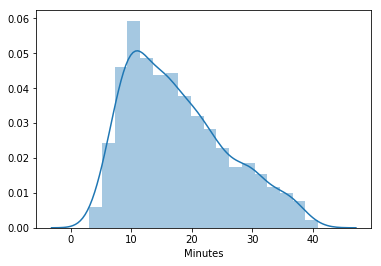

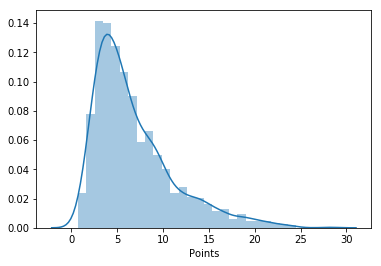

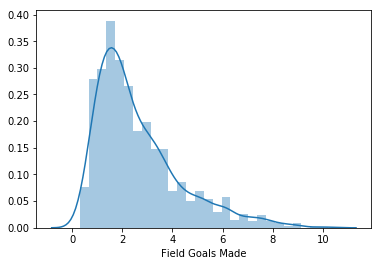

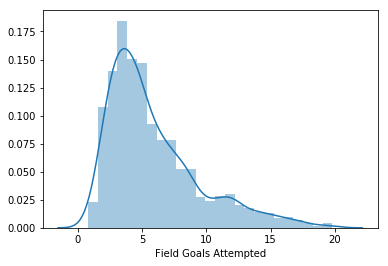

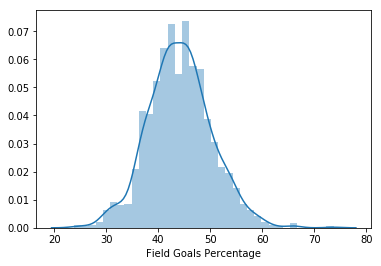

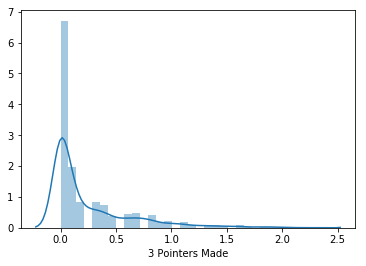

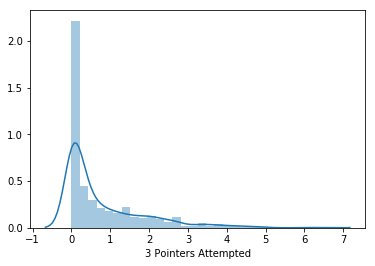

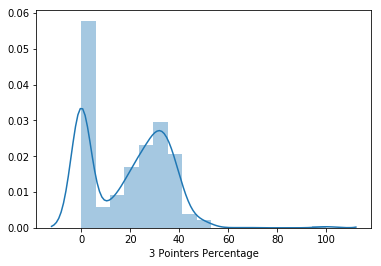

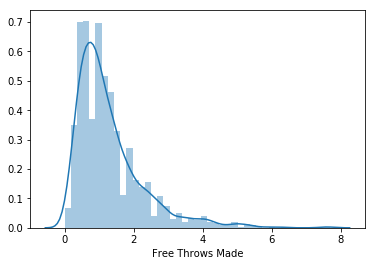

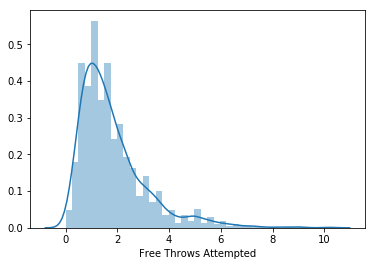

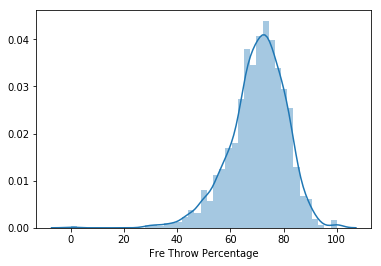

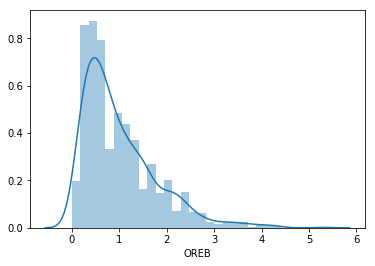

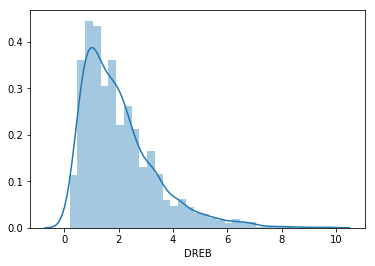

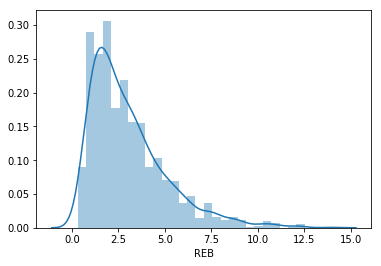

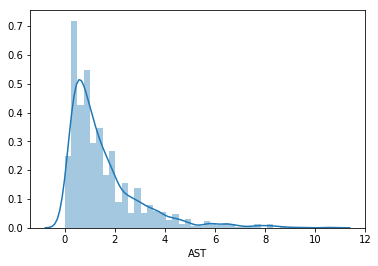

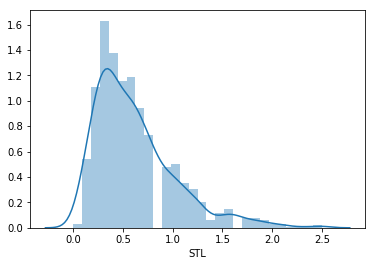

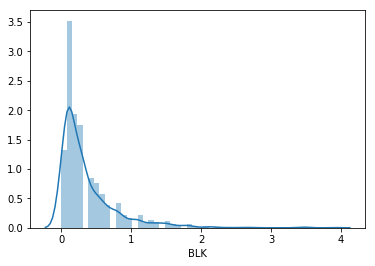

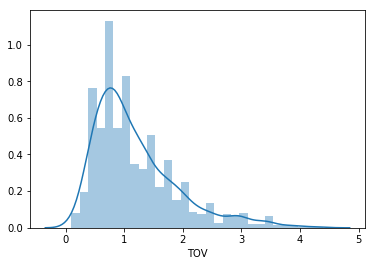

In [10]:
for i in cols_con.columns:
    sns.distplot(X[i])
    plt.show()

### Let's check the amount of skewness in our continuous predictors and depending on the type of skewness, let's apply the necessary transformations for removing the skewness

In [11]:
skewed = cols_con.skew()[abs(cols_con.skew()) > 1]

In [12]:
skewed

Points                   1.388224
Field Goals Made         1.342544
Field Goals Attempted    1.295881
3 Pointers Made          2.032815
3 Pointers Attempted     1.812435
Free Throws Made         1.941999
Free Throws Attempted    1.844482
OREB                     1.439584
DREB                     1.488681
REB                      1.481736
AST                      2.132817
STL                      1.364800
BLK                      2.804152
TOV                      1.340741
dtype: float64

In [13]:
for j in skewed.index:
    cols_con[j] = np.sqrt(cols_con[j])

In [14]:
cols_con.skew()#[abs(cols_con.skew()) > 1]

Games Played             -0.477743
Minutes                   0.632257
Points                    0.695550
Field Goals Made          0.659458
Field Goals Attempted     0.689571
Field Goals Percentage    0.208479
3 Pointers Made           0.813275
3 Pointers Attempted      0.647988
3 Pointers Percentage     0.301290
Free Throws Made          0.814065
Free Throws Attempted     0.775634
Fre Throw Percentage     -0.767863
OREB                      0.514474
DREB                      0.627066
REB                       0.659296
AST                       0.941660
STL                       0.458849
BLK                       0.721281
TOV                       0.594852
dtype: float64

### Split train and test data into X_train ,y_train,X_test and y_test data and apply a vanilla logistic regression model

In [15]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(cols_con,y,test_size = 0.3, random_state = 42)

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.7288557213930348

In [79]:
y_pred_proba = model.predict_proba(X_test)

In [113]:
roc_log = roc_auc_score(y_test,y_pred_proba[:,1])
roc_log

0.7850479466333125

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy as well as the `roc_auc_score`.

- Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric i.e `roc_auc_score` on the test data. Use parameter `random_state = 42` for results reproducibility.

In [114]:
dt2 = DecisionTreeClassifier(max_depth=3,random_state = 42)
dt2.fit(X_train,y_train)
y_pred2 = dt2.predict(X_test)
dt2.score(X_test,y_test)

0.6442786069651741

In [83]:
y_pred_proba2 = dt2.predict_proba(X_test)

In [84]:
roc_dt = roc_auc_score(y_test,y_pred_proba2[:,1])
roc_dt

0.6711877214925994

### Next let's implement a Stacking Classifier consisting of one Decision Tree and Logistic regression and a  decision tree model as a meta classifier.

In [ ]:
classifier1 = LogisticRegression(C=0.1)
classifier2= DecisionTreeClassifier(random_state=2,criterion='entropy',max_depth=4)

classifier_list=[classifier1,classifier2]

# meta-classifier
m_classifier=DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=6)


sclf = StackingClassifier(classifiers=classifier_list, meta_classifier=m_classifier)

sclf.fit(X_train,y_train)


In [ ]:
y_pred_sclf = sclf.predict(X_test)
# s_score=sclf.score(X_train,y_train)
# print("Training score: %.2f " % s_score)

s_score=sclf.score(X_test,y_test)
print("Test score: %.2f " % s_score)
print('AUC_ROC_score is ',roc_auc_score(y_test,y_pred))

###  Now let's apply a Random Forest model
- Let the parameters for the model be `criterion='gini'`, `max_depth= 6`,`max_features= 'auto'`,`n_estimators= 11`

In [85]:
rf_clf = RandomForestClassifier(random_state=12,criterion='gini', max_depth= 6,max_features= 'auto',n_estimators= 11)
rf_clf.fit(X_train,y_train)
y_pred3 = rf_clf.predict(X_test)
rf_clf.score(X_test,y_test)



0.7014925373134329

In [86]:
y_pred_proba3 = rf_clf.predict_proba(X_test)

In [87]:
roc_RF = roc_auc_score(y_test,y_pred_proba3[:,1])
roc_RF

0.759967166979362

### Let's try improving upon the accuracy of the Random Forest using hyperparameter tuning

In [25]:
parameter_grid = {'n_estimators': [11,12,13],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [3,4,5,6,7,8],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
clf = RandomForestClassifier(random_state=12)
grid_search = GridSearchCV(estimator=clf,param_grid = parameter_grid)
grid_search.fit(X_train,y_train)
score_gs = grid_search.score(X_test,y_test)
print(score_gs)

0.7064676616915423


In [26]:
y_pred4 = grid_search.predict(X_test)

In [27]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 11}

In [28]:
y_pred_proba4 = grid_search.predict_proba(X_test)

In [88]:
roc_GS_RF = roc_auc_score(y_test,y_pred_proba4[:,1])
roc_GS_RF

0.7655175109443402

### Now let's apply a Voting Classifier that consists of three models - Logistic Regression, Decision Tree and a Random Forest with a soft voting

In [30]:
m1 = LogisticRegression(random_state=42)
m2 = DecisionTreeClassifier(random_state=12)
m3 = RandomForestClassifier(random_state=14)
Model_List = [('Logistic Regression 1',m1),('Decision Tree 1',m2),('Random Forest 1',m3)]
voting_clf_soft = VotingClassifier(estimators = Model_List,voting = 'soft')
voting_clf_soft.fit(X_train,y_train)
soft_voting_score = voting_clf_soft.score(X_test,y_test)
soft_voting_score


0.6567164179104478

In [31]:
y_pred5 = voting_clf_soft.predict(X_test)

In [32]:
y_pred_proba5 = voting_clf_soft.predict_proba(X_test)

In [90]:
roc_VC_S = roc_auc_score(y_test,y_pred_proba5[:,1])
roc_VC_S

0.7265217844486138

In [91]:
# m1 = LogisticRegression(random_state=42)
# m2 = DecisionTreeClassifier(random_state=12)
# m3 = RandomForestClassifier(random_state=14)
# Model_List = [('Logistic Regression 1',m1),('Decision Tree 1',m2),('Random Forest 1',m3)]
voting_clf_hard = VotingClassifier(estimators = Model_List,voting = 'hard')
voting_clf_hard.fit(X_train,y_train)
hard_voting_score = voting_clf_hard.score(X_test,y_test)
hard_voting_score

0.7089552238805971

In [92]:
y_pred6= voting_clf_hard.predict(X_test)


In [93]:
roc_VC_H = roc_auc_score(y_test,y_pred6)
roc_VC_H

0.6777673545966227

### Let's check how a bagging classifier using a Decision Tree performs on our data

In [94]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100 , max_samples=100,random_state=0)
bagging_clf.fit(X_train,y_train)
score_bagging = bagging_clf.score(X_test,y_test)
print(score_bagging)

0.7288557213930348


In [95]:
y_pred7 = bagging_clf.predict(X_test)

In [96]:
y_pred_proba7 = bagging_clf.predict_proba(X_test)

In [97]:
roc_bag = roc_auc_score(y_test,y_pred_proba7[:,1])
roc_bag


0.7590681676047529

### Let's now visualize the AUC_ROC scores for all the models in one plot

In [98]:
roc_log,roc_dt,roc_RF,roc_GS_RF,roc_VC_S,roc_VC_H,roc_bag

(0.7850479466333125,
 0.6711877214925994,
 0.759967166979362,
 0.7655175109443402,
 0.7265217844486138,
 0.6777673545966227,
 0.7590681676047529)

In [99]:
fpr, tpr ,threshold = roc_curve(y_test,y_pred_proba[:,1])
fpr2, tpr2 ,threshold2 = roc_curve(y_test,y_pred_proba2[:,1])
fpr3, tpr3 ,threshold3 = roc_curve(y_test,y_pred_proba3[:,1])
fpr4, tpr4 ,threshold4 = roc_curve(y_test,y_pred_proba4[:,1])
fpr5, tpr5 ,threshold5 = roc_curve(y_test,y_pred_proba5[:,1])
fpr7, tpr7 ,threshold7 = roc_curve(y_test,y_pred_proba7[:,1])

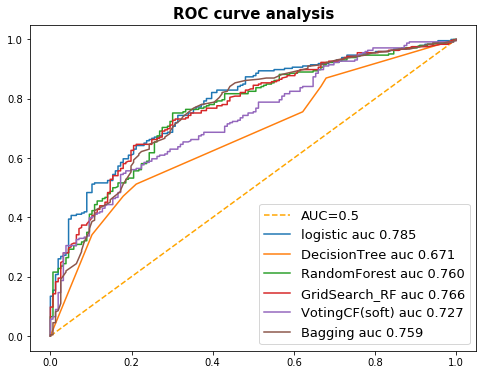

In [111]:
#roc_auc = roc_auc_score(y_test,y_pred_proba[:,0])
plt.figure(figsize=(8,6))
plt.title('ROC curve analysis', fontweight='bold', fontsize=15)
plt.plot([0,1], [0,1], color='orange', linestyle='--',label='AUC=0.5')
plt.legend(loc='best')

plt.plot(fpr,tpr,label='logistic auc '+"%.3f" % roc_log)
plt.legend(loc='best')

plt.plot(fpr2,tpr2,label='DecisionTree auc '+"%.3f" % roc_dt)
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr3,tpr3,label='RandomForest auc '+"%.3f" % roc_RF)
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr4,tpr4,label='GridSearch_RF auc '+"%.3f" % roc_GS_RF)
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr5,tpr5,label='VotingCF(soft) auc '+"%.3f" % roc_VC_S)
plt.legend(prop={'size':13}, loc='best')

plt.plot(fpr7,tpr7,label='Bagging auc '+"%.3f" % roc_bag)
plt.legend(prop={'size':13}, loc='best')